##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# loading the data
data = pd.read_csv('/content/car data.csv')

In [3]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
data.shape

(301, 9)

In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# checking the datatypes of labels
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
data.isna().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Checking missing values

In [14]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Exploration of Categorical Columns

In [ ]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [18]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

## Encoding the Categorical data

In [16]:
# encoding "Transmission" column
data.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace = True)

# encoding "Fuel_Type" column
data.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)

# encoding "Seller_Type" column
data.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)


In [17]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data

In [22]:
X = data.drop(['Car_Name', 'Selling_Price', 'Owner'], axis=1)
Y = data['Selling_Price']

In [23]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission
0    2014           5.59       27000          0            0             0
1    2013           9.54       43000          1            0             0
2    2017           9.85        6900          0            0             0
3    2011           4.15        5200          0            0             0
4    2014           6.87       42450          1            0             0
..    ...            ...         ...        ...          ...           ...
296  2016          11.60       33988          1            0             0
297  2015           5.90       60000          0            0             0
298  2009          11.00       87934          0            0             0
299  2017          12.50        9000          1            0             0
300  2016           5.90        5464          0            0             0

[301 rows x 6 columns]


In [24]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting the data into training data and testing data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

## Model Training
1. Linear Regression

In [26]:
# loading the linear regression model
lr = LinearRegression()

In [27]:
lr.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [32]:
# prediction on Training data
lr_train_predict = lr.predict(X_train)

In [33]:
# R square Error
error_square = metrics.r2_score(Y_train, lr_train_predict)
print('R square error: ', error_square)

R square error:  0.8782047343662112


## Visualise the actual price & predicted price

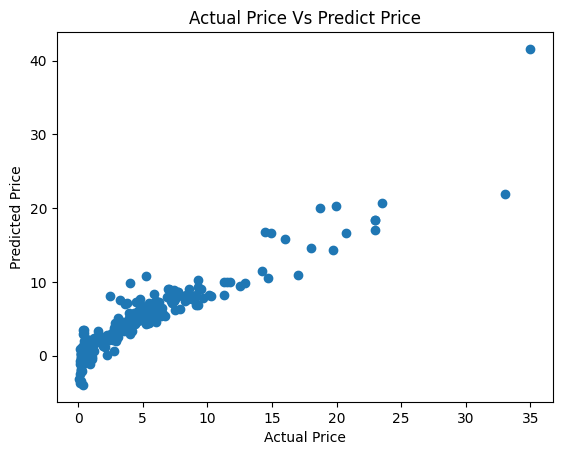

In [34]:
plt.scatter(Y_train, lr_train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predict Price')
plt.show()

In [35]:
lr_test_predict = lr.predict(X_test)

In [37]:
# R square Error
error_square = metrics.r2_score(Y_test, lr_test_predict)
print('R square error: ', error_square)

R square error:  0.8498617573093529


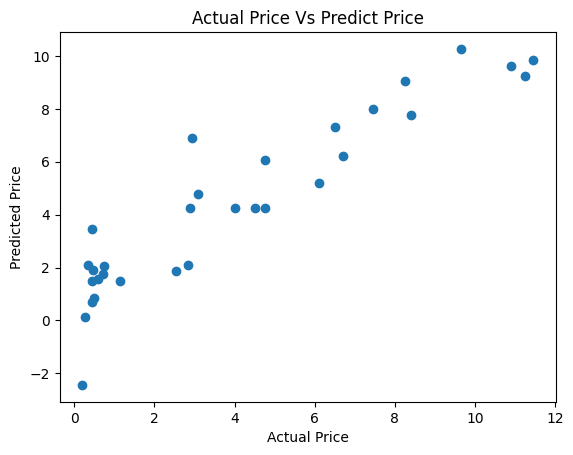

In [40]:
plt.scatter(Y_test, lr_test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predict Price')
plt.show()

2. Lasso Regression

In [41]:
# loading the linear regression model
lasso = Lasso()

In [42]:
lasso.fit(X_train, Y_train)

Lasso()

## Model Evaluation

In [43]:
# prediction on Training data
lasso_train_predict = lasso.predict(X_train)

In [44]:
# R square Error
error_square = metrics.r2_score(Y_train, lasso_train_predict)
print('R square error: ', error_square)

R square error:  0.8427856123435794


## Visualise the actual price & predicted price

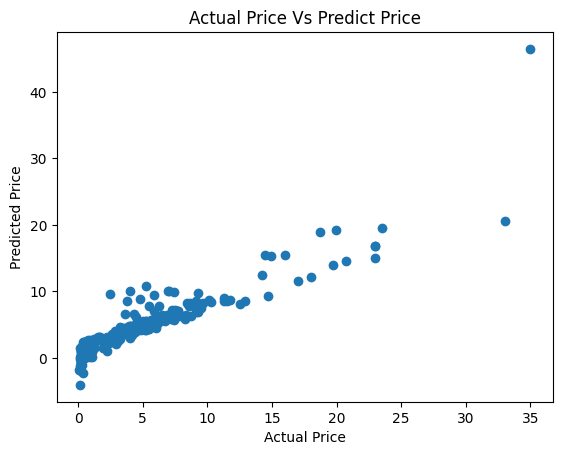

In [45]:
plt.scatter(Y_train, lasso_train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predict Price')
plt.show()

In [46]:
lasso_test_predict = lasso.predict(X_test)

In [47]:
# R square Error
error_square = metrics.r2_score(Y_test, lasso_test_predict)
print('R square error: ', error_square)

R square error:  0.8709167941173195


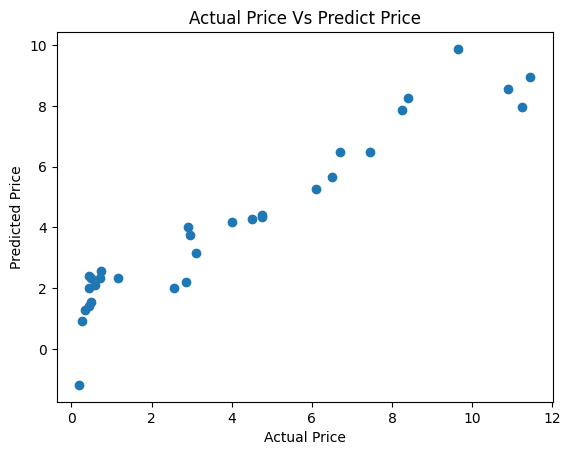

In [48]:
plt.scatter(Y_test, lasso_test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predict Price')
plt.show()